# Laboratory 1: setting up Twitter API

## Set up

### Import libraries

In [1]:
import os
import requests 
import pandas as pd 
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import numpy as np

In [7]:
%cd degree\ plot


/home/utente/Scrivania/Uni/NETWORK SCIENCE/degree plot


In [8]:
tweets_df = pd.read_csv("all_tweets.csv")

In [9]:
tweets_df

,Datetime,Tweet Id,Text,Language,Username,hastags
0,2022-01-25 10:48:11+00:00,1485927475142328320,A new sustainability initiative for the fashio...,en,TextileValue,"['carbonfootprint', 'fashion']"
1,2021-12-16 06:49:37+00:00,1471371921732165632,@adidas and @Allbirds have announced the first...,en,fibre2fashion,"['carbonfootprint', 'adidas', 'allbirds', 'car..."
2,2021-12-16 05:10:02+00:00,1471346859578773506,Nice feature @adidas\n#emissions #carbonfootpr...,en,Piper_Darling,"['emissions', 'carbonfootprint']"
3,2021-11-09 09:16:19+00:00,1458000489774129154,"At #CIIE2021 held in Shanghai, a running shoe ...",en,na2eastday,"['CIIE2021', 'adidas', 'lowcarbon', 'carbonfoo..."
4,2021-11-03 15:07:39+00:00,1455914579104391175,Support now: https://t.co/W9OXThIorN\nSUPEREAR...,en,MisterDotDot,"['adidas', 'carbonfootprint', 'saveEarth', 'ca..."
...,...,...,...,...,...,...
150013,2009-06-24 20:42:17+00:00,2315975863,Court allows mining companies to dump waste di...,en,mvxzw,"['eco', 'green', 'news', 'politics', 'supremec..."
150014,2019-08-02 19:58:33+00:00,1157380185282379776,"Prepare for #halloween with these ""October Rea...",en,GoodOmenApparel,"['halloween', 'environmentallyfriendly', 'grap..."
150015,2017-09-15 11:00:43+00:00,908646757160116224,It's an omen! First song #foofighters new alb...,en,Londondenimnews,"['foofighters', 'slowfashion']"
150016,2015-09-13 14:20:37+00:00,643066758652383232,Could this be the year #SlowFashion goes mains...,en,FairtradeMarkUS,['SlowFashion']


### Preprocessing the data

In our dataframe we have the entire Tweet object. Some columns that might be of particular interest to us are: 

*   created_at - date when Tweet was posted
*   id/id_str - unique Tweet identifiers
*   text - the content of the Tweet
*   user - information about the user who posted the Tweet
*   retweeted_status  - information about the original Tweet
*   quote/reply/retweet/favorite count - Tweet metrics
*   entities - hashtags, urls, user_mentions present in Tweet

We can filter the dataframe and keep only columns we are interested in. You can pick which columns you'd like to keep and put them int the column_list below.



In [10]:
tweets_filtered = tweets_df.copy() #it's a good idea to work on the copy of original dataframe, so we can always go back to it if we mess something up


In [11]:
tweets_filtered.dtypes

Datetime    object
Tweet Id    object
Text        object
Language    object
Username    object
hastags     object
dtype: object

In [12]:
tweets_filtered

,Datetime,Tweet Id,Text,Language,Username,hastags
0,2022-01-25 10:48:11+00:00,1485927475142328320,A new sustainability initiative for the fashio...,en,TextileValue,"['carbonfootprint', 'fashion']"
1,2021-12-16 06:49:37+00:00,1471371921732165632,@adidas and @Allbirds have announced the first...,en,fibre2fashion,"['carbonfootprint', 'adidas', 'allbirds', 'car..."
2,2021-12-16 05:10:02+00:00,1471346859578773506,Nice feature @adidas\n#emissions #carbonfootpr...,en,Piper_Darling,"['emissions', 'carbonfootprint']"
3,2021-11-09 09:16:19+00:00,1458000489774129154,"At #CIIE2021 held in Shanghai, a running shoe ...",en,na2eastday,"['CIIE2021', 'adidas', 'lowcarbon', 'carbonfoo..."
4,2021-11-03 15:07:39+00:00,1455914579104391175,Support now: https://t.co/W9OXThIorN\nSUPEREAR...,en,MisterDotDot,"['adidas', 'carbonfootprint', 'saveEarth', 'ca..."
...,...,...,...,...,...,...
150013,2009-06-24 20:42:17+00:00,2315975863,Court allows mining companies to dump waste di...,en,mvxzw,"['eco', 'green', 'news', 'politics', 'supremec..."
150014,2019-08-02 19:58:33+00:00,1157380185282379776,"Prepare for #halloween with these ""October Rea...",en,GoodOmenApparel,"['halloween', 'environmentallyfriendly', 'grap..."
150015,2017-09-15 11:00:43+00:00,908646757160116224,It's an omen! First song #foofighters new alb...,en,Londondenimnews,"['foofighters', 'slowfashion']"
150016,2015-09-13 14:20:37+00:00,643066758652383232,Could this be the year #SlowFashion goes mains...,en,FairtradeMarkUS,['SlowFashion']


In [13]:
tweets_filtered["Text"] = tweets_filtered["Text"].astype("string")

In [14]:
tweets_filtered.dtypes

Datetime    object
Tweet Id    object
Text        string
Language    object
Username    object
hastags     object
dtype: object

## Extracting words/hashtags

There are many ways to build networks from the data we download from Twitter.

One possibility is to have a bipartite network of Tweets and words/hashtags and then observe word, hashtag or word-hashtag projections.

### Extracting words

In order to extract words, we first need to clean the Tweet text. This way we will remove punctuation, hashtags/mentions/urls (they are preserved in the entity column anyway). We will also turn all letters to lowercase.

You can also consider removing stopwords, removing words that are not in the english language corpora, lematizing the words, etc. I suggest you research nltk library and its possibilities.

In [116]:
import re
import string

In [117]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) # remove mentions
    tweet = re.sub("#[A-Za-z0-9]+", "",tweet) # remove hashtags
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) # remove http links
    tweet = " ".join(tweet.split())
    tweet = str.lower(tweet) #to lowercase
    table = str.maketrans(dict.fromkeys(string.punctuation)) 
    tweet = tweet.translate(table)# remove punctuation         
    return tweet

In [118]:
tweets_filtered["clean_text"] = tweets_filtered["Text"].map(cleaner)

We are going to loop through the dataframe and then through the words in the clean text. We are going to add the words as keys to dictionary and use their frequencies as values.

In [119]:
#initialize an empty dict
unique_words = {}
for row in tweets_filtered.clean_text:
  for word in row.split(" "):
    #if the word is encountered for the first time add to dict as key and set its value to 0
    unique_words.setdefault(word,0)
    #increase the value (i.e the count) of the word by 1 every time it is encountered
    unique_words[word] += 1

In [120]:
#remove blank space
unique_words.pop("")
#remove word 'rt'
unique_words.pop("rt")

44248

We can inspect the words as a dataframe. 


You can always save this dataframe as .csv for future reference.

In [133]:
uw_df = pd.DataFrame.from_dict(unique_words, orient='index').reset_index()
uw_df.rename(columns = {'index':'Word', 0:'Count'}, inplace=True)
uw_df.sort_values(by=['Count'], ascending=False, inplace=True)
uw_df=uw_df.reset_index().drop(["index"], axis=1)

uw_df

,Word,Count
0,the,76453
1,of,62954
2,columbia,49229
3,british,45945
4,washington,39584
...,...,...
58530,850mi,1
58531,portland’s,1
58532,whiteturbo,1
58533,burlao,1


In [134]:
for i in range(0,5):
    print(uw_df.Word[i])

the
of
columbia
british
washington


Text(0.5, 1.0, 'top 5 words')

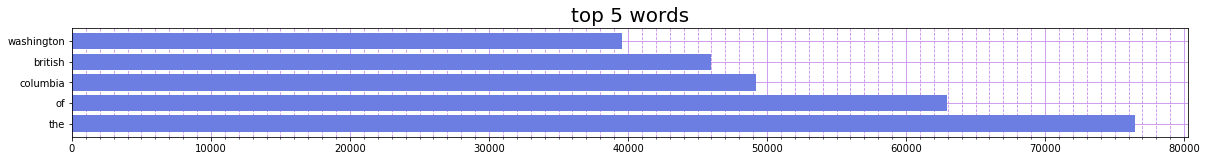

In [135]:

n = 5
title= (f"top {n} words")
bars = [uw_df.Word[i] for i in range(0, n)]
values = [uw_df.Count[i] for i in range(0, n)]
    
y = np.arange(n)
    
fig, ax = plt.subplots(figsize=(20, int(n*0.5)))
    
ax.grid(True, color = "#C688EB")
ax.barh(bars, values, color = "#6C7EE1") 
ax.set_axisbelow(True)
ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.grid(True, "minor", linestyle="--", color = "#C688EB")
ax.set_title(title, fontdict = {'fontsize' : 20})



### Extracting the hashtags

We are going to loop through the dataframe and then through the hashtags in the entities. We are going to add the hashtags as keys to dictionary and use their frequencies as values. At the same time, we are going to save them in a list and add them to a separate column to facilitate our future work.

In [16]:
tweets_filtered = tweets_filtered.rename(columns={'hastags': 'hashtags'})

In [17]:
tweets_filtered

,Datetime,Tweet Id,Text,Language,Username,hashtags
0,2022-01-25 10:48:11+00:00,1485927475142328320,A new sustainability initiative for the fashio...,en,TextileValue,"['carbonfootprint', 'fashion']"
1,2021-12-16 06:49:37+00:00,1471371921732165632,@adidas and @Allbirds have announced the first...,en,fibre2fashion,"['carbonfootprint', 'adidas', 'allbirds', 'car..."
2,2021-12-16 05:10:02+00:00,1471346859578773506,Nice feature @adidas #emissions #carbonfootpri...,en,Piper_Darling,"['emissions', 'carbonfootprint']"
3,2021-11-09 09:16:19+00:00,1458000489774129154,"At #CIIE2021 held in Shanghai, a running shoe ...",en,na2eastday,"['CIIE2021', 'adidas', 'lowcarbon', 'carbonfoo..."
4,2021-11-03 15:07:39+00:00,1455914579104391175,Support now: https://t.co/W9OXThIorN SUPEREART...,en,MisterDotDot,"['adidas', 'carbonfootprint', 'saveEarth', 'ca..."
...,...,...,...,...,...,...
150013,2009-06-24 20:42:17+00:00,2315975863,Court allows mining companies to dump waste di...,en,mvxzw,"['eco', 'green', 'news', 'politics', 'supremec..."
150014,2019-08-02 19:58:33+00:00,1157380185282379776,"Prepare for #halloween with these ""October Rea...",en,GoodOmenApparel,"['halloween', 'environmentallyfriendly', 'grap..."
150015,2017-09-15 11:00:43+00:00,908646757160116224,It's an omen! First song #foofighters new alb...,en,Londondenimnews,"['foofighters', 'slowfashion']"
150016,2015-09-13 14:20:37+00:00,643066758652383232,Could this be the year #SlowFashion goes mains...,en,FairtradeMarkUS,['SlowFashion']


In [18]:
unique_hashtags = {}

tweets_filtered["hashtags"] = ""

for idx, row in tweets_filtered.iterrows():
  hashtag_list = []
  for hashtag in row["hashtags"]:
    unique_hashtags.setdefault("#"+hashtag["text"], 0)
    unique_hashtags['#'+hashtag["text"]] += 1
    hashtag_list.append(hashtag["text"])
  tweets_filtered.at[idx,"hashtags"] = hashtag_list


In [20]:
unique_hashtags

{}

In [19]:
uh_df = pd.DataFrame.from_dict(unique_hashtags, orient='index').reset_index()
uh_df.rename(columns = {'index':'Hashtag', 0:'Count'}, inplace=True)
uh_df.sort_values(by=['Count'], ascending=False, inplace=True)
uh_df=uh_df.reset_index().drop(["index"], axis=1)


KeyError: 'Count'

In [143]:
uh_df

,Hashtag


Text(0.5, 1.0, 'top 10 words')

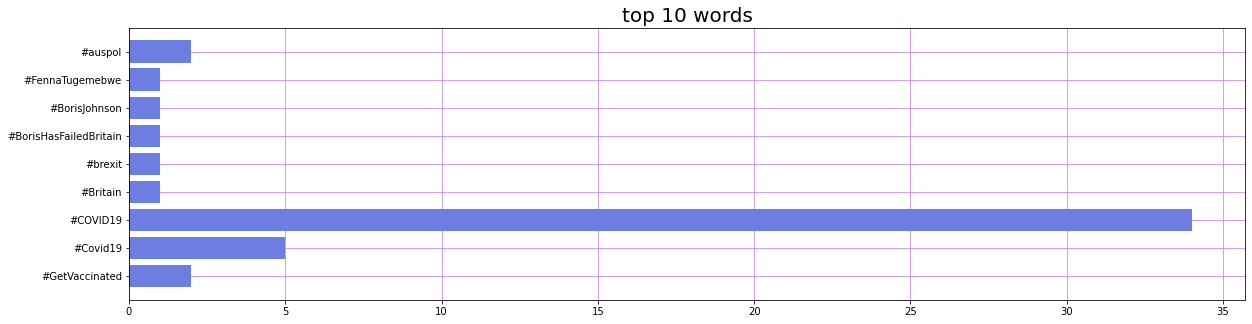

In [52]:
n = 10
title= (f"top {n} words")
bars = [uh_df.Hashtag[i] for i in range(1, n)]
values = [uh_df.Count[i] for i in range(1, n)]
    
y = np.arange(n)
    
fig, ax = plt.subplots(figsize=(20, int(n*0.5)))
    
ax.grid(True, color = "#C688EB")
ax.barh(bars, values, color = "#6C7EE1") 
ax.set_axisbelow(True)
ax.xaxis.set_minor_locator(MultipleLocator(1000))
ax.grid(True, "minor", linestyle="--", color = "#C688EB")
ax.set_title(title, fontdict = {'fontsize' : 20})
